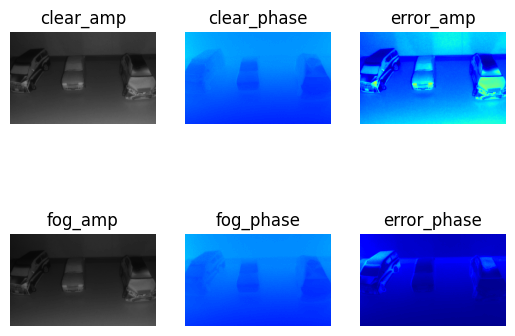

In [9]:
import numpy as np
import matplotlib.pyplot as plt

DistanceScale=[0,4000]
CONST_C = 299792458 #speed of light (m/s)
CONST_F = 40*1e6 #modulation frequency (Hz) 


def main():
#     fog_amp_path = 'data/train/912clear_tof/925_5_clear_amp.npy'
#     fog_phase_path = 'data/train/912clear_tof/925_5_clear_phase.npy'

    clear_amp_path = 'syn_data_v2/train/clear_tof/amp/sample_amp_1214_2_0014.npy'
    clear_phase_path = 'syn_data_v2/train/clear_tof/phase/sample_phase_1214_2_0014.npy'
    fog_amp_path = 'syn_data_v2/train/fog_tof/amp/syn_amp_1214_2_0014.npy'
    fog_phase_path = 'syn_data_v2/train/fog_tof/phase/syn_phase_1214_2_0014.npy'
    
    clear_amp = np.load(clear_amp_path)
    clear_phase = np.load(clear_phase_path)
    fog_amp = np.load(fog_amp_path)
    fog_phase = np.load(fog_phase_path)
    
    clear_phase = clear_phase[clear_phase.shape[0]//2 - 70 : clear_phase.shape[0]//2 + 170, clear_phase.shape[1]//2 - 190 : clear_phase.shape[1]//2 + 190]
    clear_amp = clear_amp[clear_amp.shape[0]//2 - 70 : clear_amp.shape[0]//2 + 170, clear_amp.shape[1]//2 - 190 : clear_amp.shape[1]//2 + 190]
    
    clear_phase = clear_phase - 4*np.pi*CONST_F*0.88/CONST_C
    clear_phase[clear_phase<0] = 0.1
    
    
    plt.subplot(2,3,1)
    plt.imshow(clear_amp, vmin=0, vmax=1000, cmap='gray')
    plt.title('clear_amp')
    plt.axis('off')
 
    
    plt.subplot(2,3,2)
    plt.imshow(clear_phase,vmin=0, vmax=np.pi*2)
    plt.jet()
    plt.title('clear_phase')
    plt.axis('off')
    
    plt.subplot(2,3,3)
    plt.imshow(np.abs(clear_amp -fog_amp),vmin=0, vmax=200)
    plt.jet()
    plt.title('error_amp')
    plt.axis('off')
    
    plt.subplot(2,3,4)
    plt.imshow(fog_amp, vmin=0, vmax=1000, cmap='gray')
    plt.title('fog_amp')
    plt.axis('off')
 
    
    plt.subplot(2,3,5)
    plt.imshow(fog_phase, vmin=0, vmax=np.pi*2)
    plt.jet()
    plt.title('fog_phase')
    plt.axis('off')
    
    plt.subplot(2,3,6)
    plt.imshow(np.abs(clear_phase-fog_phase), vmin=0, vmax=np.pi/4)
    plt.jet()
    plt.title('error_phase')
    plt.axis('off')
  
    plt.show()   

def reScale(pixArray,scale):
    super_threshold_indices = pixArray >= scale[1]
    pixArray[super_threshold_indices] = scale[1]-1
    super_threshold_indices = pixArray < scale[0]
    pixArray[super_threshold_indices] = scale[0]
    pixArray=pixArray-scale[0]
    pixArray=pixArray*(65536/(scale[1]-scale[0]))
    pixArray8b = (pixArray/256).astype('uint8')
    return pixArray8b

def cal_dist_avg(output_phase):
    unAmbiguousRange = (0.5*299792458)/(40*1000)
    coefRad = unAmbiguousRange / (2*np.pi)
    dist = (output_phase+np.pi)*coefRad
    # dist = np.resize(dist, (px_height, px_width))
    return dist
    
if __name__ == '__main__':
    main()